In [1]:
# Nhập thư viện
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import time

import warnings
warnings.filterwarnings('ignore')

# Đọc bộ dữ liệu
corpus = pd.read_csv('data/cleaned_mhc.csv')

# Chuẩn bị dữ liệu
X_train, X_test, y_train, y_test = train_test_split(
    corpus['text'],
    corpus['label'],
    test_size=0.2,
    random_state=42
)

tfidf = TfidfVectorizer(max_features=3500)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

n_components = 100

lsa = TruncatedSVD(n_components=n_components, random_state=42)
X_train_lsa = lsa.fit_transform(X_train_tfidf)
X_test_lsa = lsa.transform(X_test_tfidf)

print(f"TF-IDF - Train shape: {X_train_tfidf.shape}, Test Shape: {X_test_tfidf.shape}")
print(f"LSA - Train shape: {X_train_lsa.shape}, Test Shape: {X_test_lsa.shape}")

TF-IDF - Train shape: (18592, 3500), Test Shape: (4648, 3500)
LSA - Train shape: (18592, 100), Test Shape: (4648, 100)


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import pandas as pd
import time

# Define regularization settings
regularization_configs = [
    {'penalty': None, 'C': None},  # No regularization
    {'penalty': 'l2', 'C': 0.01},
    {'penalty': 'l2', 'C': 0.1},
    {'penalty': 'l2', 'C': 5},
    {'penalty': 'l2', 'C': 10},
    {'penalty': 'l2', 'C': 100},
    {'penalty': 'l2', 'C': 200},
    {'penalty': 'l2', 'C': 500},
    {'penalty': 'l2', 'C': 1000}
]

# Metrics dictionaries for separate tables
metrics_tfidf = {
    'Penalty': [],
    'C': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'Fit Time (s)': [],
    'Test Time (s)': [],
    'Confusion Matrix': []
}

metrics_lsa = {
    'Penalty': [],
    'C': [],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'Fit Time (s)': [],
    'Test Time (s)': [],
    'Confusion Matrix': []
}

# Iterate through regularization configs for both TF-IDF and LSA
for config in regularization_configs:
    # Logistic Regression model configuration
    penalty = config['penalty']
    C = config['C']
    if penalty is None:
        log_reg_tfidf = LogisticRegression(random_state=42, max_iter=1000)
        log_reg_lsa = LogisticRegression(random_state=42, max_iter=1000)
    else:
        log_reg_tfidf = LogisticRegression(penalty=penalty, C=C, random_state=42, max_iter=1000)
        log_reg_lsa = LogisticRegression(penalty=penalty, C=C, random_state=42, max_iter=1000)
    
    # TF-IDF
    start_fit = time.time()
    log_reg_tfidf.fit(X_train_tfidf, y_train)
    fit_time = time.time() - start_fit
    
    start_test = time.time()
    y_train_pred = log_reg_tfidf.predict(X_train_tfidf)
    y_test_pred = log_reg_tfidf.predict(X_test_tfidf)
    test_time = time.time() - start_test
    
    metrics_tfidf['Penalty'].append(penalty if penalty else 'None')
    metrics_tfidf['C'].append(C if C else 'None')
    metrics_tfidf['Train Accuracy'].append(accuracy_score(y_train, y_train_pred))
    metrics_tfidf['Test Accuracy'].append(accuracy_score(y_test, y_test_pred))
    metrics_tfidf['F1 Score'].append(f1_score(y_test, y_test_pred))
    metrics_tfidf['Precision'].append(precision_score(y_test, y_test_pred))
    metrics_tfidf['Recall'].append(recall_score(y_test, y_test_pred))
    metrics_tfidf['Fit Time (s)'].append(fit_time)
    metrics_tfidf['Test Time (s)'].append(test_time)
    metrics_tfidf['Confusion Matrix'].append(confusion_matrix(y_test, y_test_pred))
    
    # LSA
    start_fit = time.time()
    log_reg_lsa.fit(X_train_lsa, y_train)
    fit_time = time.time() - start_fit
    
    start_test = time.time()
    y_train_pred = log_reg_lsa.predict(X_train_lsa)
    y_test_pred = log_reg_lsa.predict(X_test_lsa)
    test_time = time.time() - start_test
    
    metrics_lsa['Penalty'].append(penalty if penalty else 'None')
    metrics_lsa['C'].append(C if C else 'None')
    metrics_lsa['Train Accuracy'].append(accuracy_score(y_train, y_train_pred))
    metrics_lsa['Test Accuracy'].append(accuracy_score(y_test, y_test_pred))
    metrics_lsa['F1 Score'].append(f1_score(y_test, y_test_pred))
    metrics_lsa['Precision'].append(precision_score(y_test, y_test_pred))
    metrics_lsa['Recall'].append(recall_score(y_test, y_test_pred))
    metrics_lsa['Fit Time (s)'].append(fit_time)
    metrics_lsa['Test Time (s)'].append(test_time)
    metrics_lsa['Confusion Matrix'].append(confusion_matrix(y_test, y_test_pred))

# Convert metrics to DataFrames
results_tfidf = pd.DataFrame(metrics_tfidf)
results_lsa = pd.DataFrame(metrics_lsa)

# Display the results
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
print("TF-IDF Results:")
print(results_tfidf)

print("\nLSA Results:")
print(results_lsa)

TF-IDF Results:
  Penalty     C  Train Accuracy  Test Accuracy  F1 Score  Precision    Recall  \
0    None  None        0.939221       0.922762  0.929539   0.930086  0.928992   
1      l2  0.01        0.879195       0.878227  0.892518   0.864925  0.921930   
2      l2   0.1        0.909800       0.902969  0.911203   0.914625  0.907807   
3      l2     5        0.952991       0.925344  0.931787   0.933806  0.929776   
4      l2    10        0.960682       0.920611  0.927377   0.930490  0.924284   
5      l2   100        0.976764       0.899957  0.908555   0.910883  0.906238   
6      l2   200        0.970417       0.905120  0.913274   0.915615  0.910945   
7      l2   500        0.970041       0.904475  0.912702   0.914860  0.910553   
8      l2  1000        0.969987       0.903399  0.911736   0.913712  0.909769   

   Fit Time (s)  Test Time (s)            Confusion Matrix  
0      0.051244       0.000000  [[1921, 178], [181, 2368]]  
1      0.019054       0.001000  [[1732, 367], [199,

In [3]:
# Create DataFrames for TF-IDF and LSA results
tfidf_results = results_tfidf.drop(columns=['Penalty', 'Confusion Matrix'])
lsa_results = results_lsa.drop(columns=['Penalty', 'Confusion Matrix'])

# Define desired column order
ordered_columns = [
    "C", "Train Accuracy", "Test Accuracy", "F1 Score", "Precision", "Recall"
]

# Reorder columns
tfidf_results = tfidf_results[ordered_columns]
lsa_results = lsa_results[ordered_columns]

# Style tables with heatmap, excluding the 'C' column from coloring
def style_heatmap(df, cmap):
    return df.style.applymap(lambda _: "background-color: none;", subset=['C']).background_gradient(
        cmap=cmap, subset=df.columns.difference(['C'])
    ).format(precision=3)

# Apply styles
tfidf_table_styled = style_heatmap(tfidf_results, cmap="Reds")
lsa_table_styled = style_heatmap(lsa_results, cmap="Blues")

# Display the styled tables
print("TF-IDF Results with Styled Heatmap:")
display(tfidf_table_styled)

print("\nLSA Results with Styled Heatmap:")
display(lsa_table_styled)


TF-IDF Results with Styled Heatmap:


,C,Train Accuracy,Test Accuracy,F1 Score,Precision,Recall
0,None,0.939,0.923,0.930,0.930,0.929
1,0.010,0.879,0.878,0.893,0.865,0.922
2,0.100,0.910,0.903,0.911,0.915,0.908
3,5,0.953,0.925,0.932,0.934,0.930
4,10,0.961,0.921,0.927,0.930,0.924
5,100,0.977,0.900,0.909,0.911,0.906
6,200,0.970,0.905,0.913,0.916,0.911
7,500,0.970,0.904,0.913,0.915,0.911
8,1000,0.970,0.903,0.912,0.914,0.910



LSA Results with Styled Heatmap:


,C,Train Accuracy,Test Accuracy,F1 Score,Precision,Recall
0,None,0.910,0.908,0.916,0.920,0.912
1,0.010,0.875,0.873,0.888,0.860,0.918
2,0.100,0.898,0.898,0.907,0.913,0.901
3,5,0.912,0.910,0.918,0.922,0.914
4,10,0.912,0.910,0.918,0.922,0.914
5,100,0.912,0.911,0.918,0.923,0.914
6,200,0.912,0.911,0.919,0.923,0.914
7,500,0.912,0.912,0.919,0.923,0.916
8,1000,0.912,0.912,0.919,0.923,0.916


In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

C = 5
penalty='l2'
max_iter=1000

# log_reg_tfidf = LogisticRegression(penalty=penalty, C=C, random_state=42, max_iter=max_iter)
# log_reg_lsa = LogisticRegression(penalty=penalty, C=C, random_state=42, max_iter=max_iter)

log_reg_tfidf = LogisticRegression(random_state=42, max_iter=max_iter)
log_reg_lsa = LogisticRegression(random_state=42, max_iter=max_iter)

metrics = {
    'Model': ['TF-IDF', 'LSA'],
    'Train Accuracy': [],
    'Test Accuracy': [],
    'F1 Score': [],
    'Precision': [],
    'Recall': [],
    'Fit Time (s)': [],
    'Test Time (s)': [],
    'Confusion Matrix': []
}

start_fit = time.time()
log_reg_tfidf.fit(X_train_tfidf, y_train)
fit_time = time.time() - start_fit

start_test = time.time()
y_train_pred = log_reg_tfidf.predict(X_train_tfidf)
y_test_pred = log_reg_tfidf.predict(X_test_tfidf)
test_time = time.time() - start_test

metrics['Train Accuracy'].append(accuracy_score(y_train, y_train_pred))
metrics['Test Accuracy'].append(accuracy_score(y_test, y_test_pred))
metrics['F1 Score'].append(f1_score(y_test, y_test_pred))
metrics['Precision'].append(precision_score(y_test, y_test_pred))
metrics['Recall'].append(recall_score(y_test, y_test_pred))
metrics['Fit Time (s)'].append(fit_time)
metrics['Test Time (s)'].append(test_time)
metrics['Confusion Matrix'].append(confusion_matrix(y_test, y_test_pred))

start_fit = time.time()
log_reg_lsa.fit(X_train_lsa, y_train)
fit_time = time.time() - start_fit

start_test = time.time()
y_train_pred = log_reg_lsa.predict(X_train_lsa)
y_test_pred = log_reg_lsa.predict(X_test_lsa)
test_time = time.time() - start_test

metrics['Train Accuracy'].append(accuracy_score(y_train, y_train_pred))
metrics['Test Accuracy'].append(accuracy_score(y_test, y_test_pred))
metrics['F1 Score'].append(f1_score(y_test, y_test_pred))
metrics['Precision'].append(precision_score(y_test, y_test_pred))
metrics['Recall'].append(recall_score(y_test, y_test_pred))
metrics['Fit Time (s)'].append(fit_time)
metrics['Test Time (s)'].append(test_time)
metrics['Confusion Matrix'].append(confusion_matrix(y_test, y_test_pred))

import pandas as pd

results_df = pd.DataFrame(metrics)
print(results_df)

print("\nConfusion Matrices:")
print(f"TF-IDF Confusion Matrix:\n{metrics['Confusion Matrix'][0]}")
print(f"LSA Confusion Matrix:\n{metrics['Confusion Matrix'][1]}")


    Model  Train Accuracy  Test Accuracy  F1 Score  Precision    Recall  \
0  TF-IDF        0.939221       0.922762  0.929539   0.930086  0.928992   
1     LSA        0.910499       0.908133  0.915862   0.920032  0.911730   

   Fit Time (s)  Test Time (s)            Confusion Matrix  
0      0.049203       0.002001  [[1921, 178], [181, 2368]]  
1      0.022001       0.000999  [[1897, 202], [225, 2324]]  

Confusion Matrices:
TF-IDF Confusion Matrix:
[[1921  178]
 [ 181 2368]]
LSA Confusion Matrix:
[[1897  202]
 [ 225 2324]]


Top 70 coefficients for TF-IDF model:
redflag: 8.2986
kill: 7.5121
film: -6.0625
suicidal: 5.8278
life: 5.7273
die: 5.5285
movie: -5.3161
cannot: 4.5489
anymore: 4.3494
depression: 4.2671
killing: 3.9049
feel: 3.9035
want: 3.8964
pill: 3.5690
end: 3.4158
living: 3.3890
depressed: 3.3631
alive: 3.3393
crush: -3.3278
yall: -3.1375
tried: 3.1137
job: 3.0395
alone: 2.9842
live: 2.9030
worse: 2.8354
family: 2.8202
tired: 2.8084
pain: 2.7970
character: -2.7529
kinda: -2.7526
thought: 2.7406
guy: -2.7318
death: 2.7156
que: 2.6913
point: 2.6599
nothing: 2.6406
cant: 2.5813
hospital: 2.5623
done: 2.5501
everything: 2.5449
like: -2.4034
school: -2.3938
fun: -2.3908
rope: 2.3872
gun: 2.3638
therapy: 2.3498
world: 2.3346
suicide: 2.3271
jump: 2.3258
bruh: -2.3243
ending: 2.2963
work: 2.2669
way: 2.2314
covid: -2.2241
hang: 2.2212
last: 2.2062
girl: -2.1873
wish: 2.1749
minecraft: -2.1617
teacher: -2.1613
going: 2.1496
tonight: 2.1331
dead: 2.1246
gone: 2.0989
attempt: 2.0905
award: -2.0898
teenage

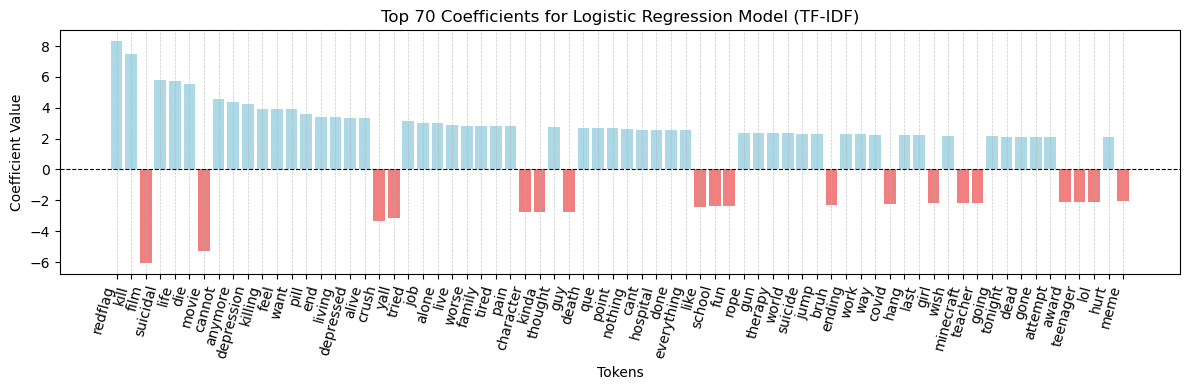

In [9]:
feature_names_tfidf = tfidf.get_feature_names_out()

k = 70

coefficients_tfidf = log_reg_tfidf.coef_[0]
top_k_tfidf_indices = np.argsort(np.abs(coefficients_tfidf))[-k:][::-1]
top_k_tfidf_terms = [(feature_names_tfidf[i], coefficients_tfidf[i]) for i in top_k_tfidf_indices]

print(f"Top {k} coefficients for TF-IDF model:")
for term, coef in top_k_tfidf_terms:
    print(f"{term}: {coef:.4f}")

h = 15

coefficients_lsa = log_reg_lsa.coef_[0]
top_h_lsa_indices = np.argsort(np.abs(coefficients_lsa))[-h:][::-1]
top_h_lsa_terms = [(f"Topic {i}", coefficients_lsa[i]) for i in top_h_lsa_indices]

print(f"\nTop {h} coefficients for LSA model:")
for topic, coef in top_h_lsa_terms:
    print(f"{topic}: {coef:.4f}")



# Extract the top-k terms based on absolute values of coefficients
top_k_tfidf_indices = np.argsort(np.abs(coefficients_tfidf))[-k:][::-1]
top_k_tfidf_terms = [(feature_names_tfidf[i], coefficients_tfidf[i]) for i in top_k_tfidf_indices]

# Prepare data for the bar chart
terms, coefs = zip(*top_k_tfidf_terms)
colors = ['lightcoral' if coef < 0 else 'lightblue' for coef in coefs]

# Plot the bar chart
plt.figure(figsize=(12, 4))
plt.bar(terms, coefs, color=colors)
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.xticks(rotation=75, ha='right')
plt.title(f"Top {k} Coefficients for Logistic Regression Model (TF-IDF)")
plt.xlabel("Tokens")
plt.ylabel("Coefficient Value")
plt.grid(axis='x', linestyle='--', linewidth=0.5, alpha=0.7)  # Adding gridlines
plt.tight_layout()
plt.show()

In [7]:
print("LogReg TFIDF Hyperparameters:")
print(log_reg_tfidf.get_params())

print("\nLogReg LSA Hyperparameters:")
print(log_reg_lsa.get_params())

LogReg TFIDF Hyperparameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

LogReg LSA Hyperparameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 1000, 'multi_class': 'deprecated', 'n_jobs': None, 'penalty': 'l2', 'random_state': 42, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
